**Pulse Code Modulation.**


In [ ]:

#2017331064

import numpy as np
import math
import matplotlib.pyplot as plt


**Creating Sinusoidal** : $$x(t) = A\cos(2\pi f t + phase)$$


In [ ]:
def init_sinWave( t ,A,f, phase=0 ):
  x= A * np.sin(2.0*np.pi*f*t+  phase )
#  print(x)
  return x  

**basic signal**

*   Amplitude A=6
*   Frequency F=2
*   Time (0 -> 3 )sec



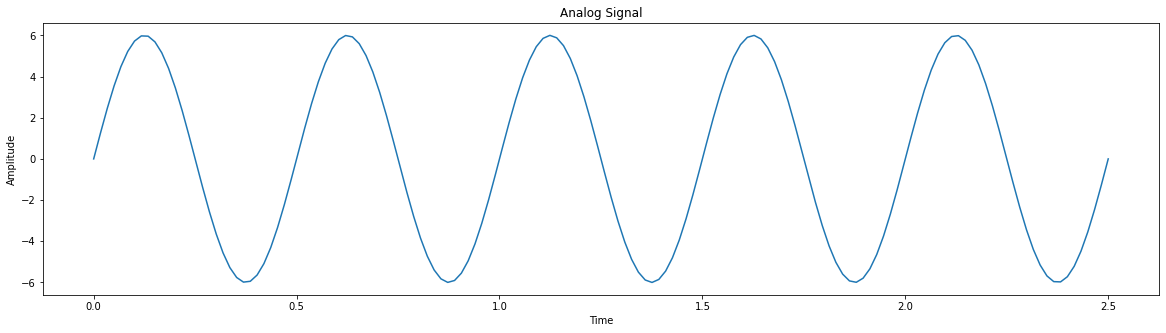

In [ ]:
A=6
f=2
t=np.linspace(0,2.5,150)

#CREATING SIN_WAVE
x= init_sinWave( t,A,f)

plt.figure(figsize=(20,5))
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Analog Signal')
plt.show()

## **Step 1 : Sampling**



*   *Number of Sample*, **N**=25 
*   *Sampling Rate* ,   **Fs**= N x F



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


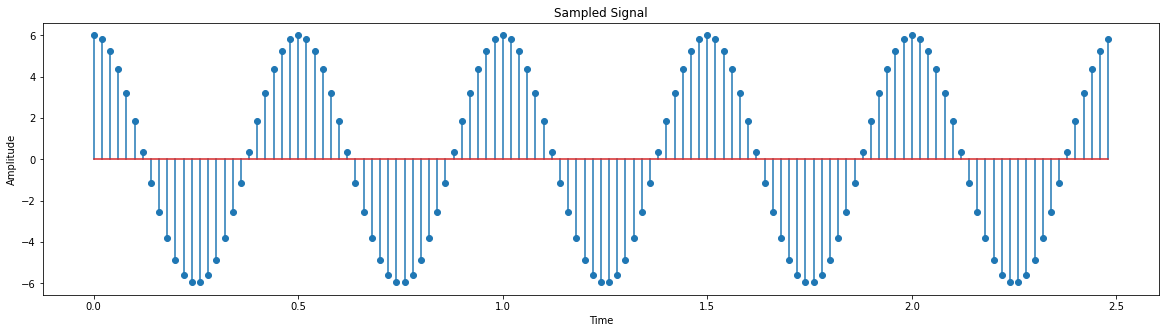

In [ ]:
n=25
fs= n*f
ts=np.arange(0,2.5, 1/fs)

#SAMPLED SIGNAL
xs=A *np.cos(2*np.pi * f * ts) 

plt.figure(figsize=(20,5))
plt.stem(ts,xs)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')
plt.show()

## **Step 2 : Quantization**



*  L= Quantization Levels
*  P_n= *Partition *( Level betweem ***V***max & ***Vmin*** with delta difference)
*  B_bit= Quantizer Bits
*  Vmax/Vmin= Amplitude***(+/-)***


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


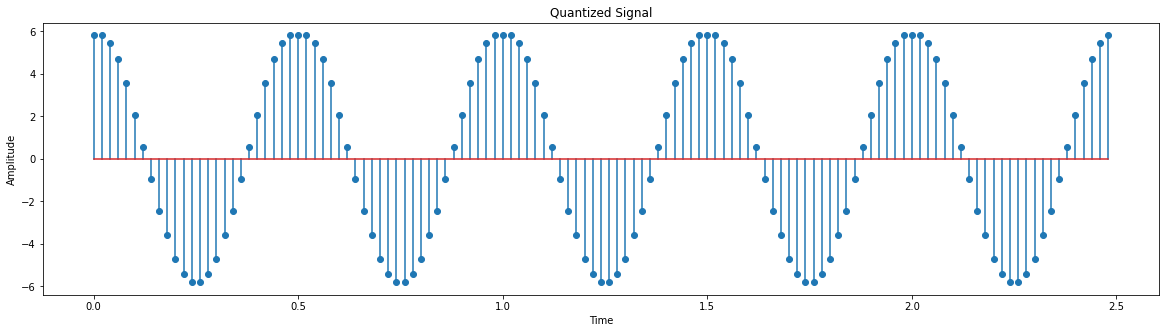

In [ ]:

b_bit = 5
L = 2 ** b_bit
vmin=-A 
vmax=A;
delta=(vmax-vmin)/L;
p_n = np.arange(vmin, vmax, delta)
c_book= np.arange(vmin-(delta/2),vmax+(delta/2), delta) 

xq = np.copy(xs)
encode = np.copy(xs)

for i in range(len(p_n)):
  last = c_book[i + 1]
  first = c_book[i]
  for j in range(len(xs)):
    if(i != len(p_n) - 1 and first <= xs[j] and xs[j] < last):
      xq[j] = p_n[i]
      encode[j] = i
    if(i == len(p_n) - 1 and first <= xs[j]):
      xq[j] = p_n[i]
      encode[j] = i

for i in range(len(xq)):
    xq[i] = xq[i] + (delta / 2) 

plt.figure(figsize=(20,5))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Quantized Signal')
plt.stem(ts, xq)
plt.show()

## **Step 3 : Encoding**

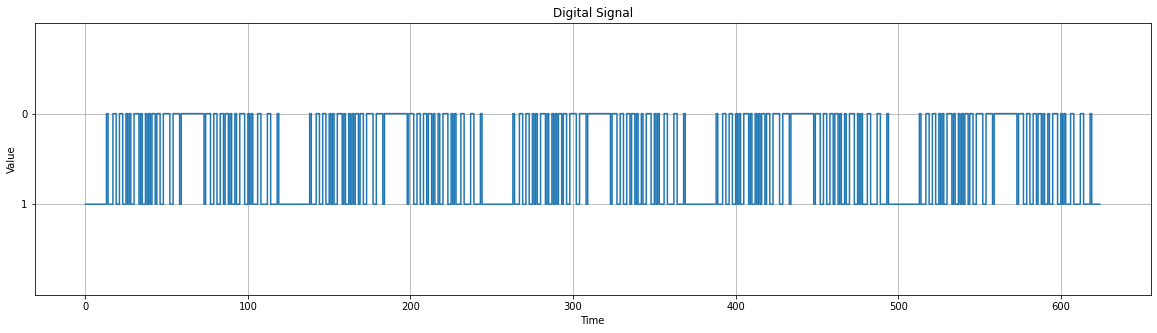

In [ ]:
def decimalToBinary(val, bit):
    binary = "{0:b}".format(int(val))
    if(len(binary) > bit):
      return binary
    extra_zero = bit - len(binary)
    return extra_zero * "0" + binary

binary_codec = []
for i in range(len(encode)):
  binary = decimalToBinary(encode[i], b_bit)
  for j in range(len(binary)):
    binary_codec.append(binary[j])

pos = np.arange(len(binary_codec))
plt.figure(figsize=(20, 5))
plt.grid('on')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Digital Signal')
plt.ylim(-1, 2)
plt.step(pos, binary_codec)
plt.show()